# Step 1 - Constrain your Milky Way Model

This notebook presents how to plot the basic galaxy evolution properties of your simple Milky Way model, using OMEGA+
([Côté et al. 2018](http://adsabs.harvard.edu/abs/2018ApJ...859...67C)). Those plots will allow you to calibrate your model against several observations (taken from [Kubryk et al. 2015](http://adsabs.harvard.edu/abs/2015A%26A...580A.126K)).

**Open-source Python packages**
* [NuPyCEE](https://github.com/NuGrid/NuPyCEE) - NuGrid Python Chemical Evolution Environment
* [JINAPyCEE](https://github.com/becot85/JINAPyCEE) - JINA Python Chemical Evolution Environment

In [1]:
# Import the OMEGA+ code and standard packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from JINAPyCEE import omega_plus

# Your Tasks

* Understand the impact of the star formation efficiency and the galactic inflow rate on the general properties of your Milky Way model.
* Find a set of input parameters that reproduce the observational constraints.
    * .. does not need to be perfect!

### Key Equation for Star Formation

The global star formation rate ($\dot{M}_\star$) inside the galaxy model at time $t$ depends on the mass of gas $M_{gas}$ inside the galaxy, the star formation efficiency $f_\star$, and the star formation timescale $\tau_\star$ (e.g., <a href="http://adsabs.harvard.edu/abs/2006RPPh...69.3101B">Baugh 2006</a>; <a href="http://adsabs.harvard.edu/abs/2015ARA%26A..53...51S">Somerville & Davé 2015</a>).

$$\dot{M}_\star(t)=f_\star\frac{M_\mathrm{gas}(t)}{\tau_\star}\quad\mbox{[M$_\odot$ yr$^{-1}$]}$$

### Select Input Parameters and Run OMEGA+

In the following example, you will be using a galactic inflow prescription that is similar to the two-infall model presented in [Chiappini et al. (1997)](http://adsabs.harvard.edu/abs/1997ApJ...477..765C).

In [2]:
# Star formation efficiency (f_\star) --> [dimensionless]
sfe = 0.01

# Star formation timescale (\tau_\star) --> [yr]
t_star = 1.0e8

# Galactic inflow rate
# Magnitude (strength) of the inflow rate
in_mag = 1.0

# !! Do not modify !! as a first pass..
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]

# Run OMEGA+ with the first set of parameters
o_1 = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, special_timesteps=90)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 5.75s
   OMEGA+ run completed - Run time: 5.75s


In [3]:
# Set of parameters for the second run
# !! Please modify whatever you want !!
sfe = 0.04
t_star = 1.0e8
in_mag = 1.0

# Run OMEGA+ with the second set of parameters
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
o_2 = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, special_timesteps=90)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 5.78s
   OMEGA+ run completed - Run time: 5.78s


### Plot the Star Formation History

**Note:** The OMEGA instance (central galaxy in OMEGA+) can be accessed with the "inner" variable.

The estimated total stellar mass of the Milky Way is about $5\times10^{10}$ M$_\odot$.

The current star formation rate (SFR) is about 2 M$_\odot$ yr$^{-1}$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** With a higher star formation efficiency, the gas reservoir will be converted into stars more rapidly.

**Useful Information:** The magnitude of the star formation rate is very sensitive to the galactic inflow rate.

In [4]:
# Print the total stellar mass formed
print("Integrated stellar mass for Run 1:",'%.2e'%sum(o_1.inner.history.m_locked),'M_sun')
print("Integrated stellar mass for Run 2:",'%.2e'%sum(o_2.inner.history.m_locked),'M_sun')

Integrated stellar mass for Run 1: 3.28e+10 M_sun
Integrated stellar mass for Run 2: 4.07e+10 M_sun


<IPython.core.display.Javascript object>


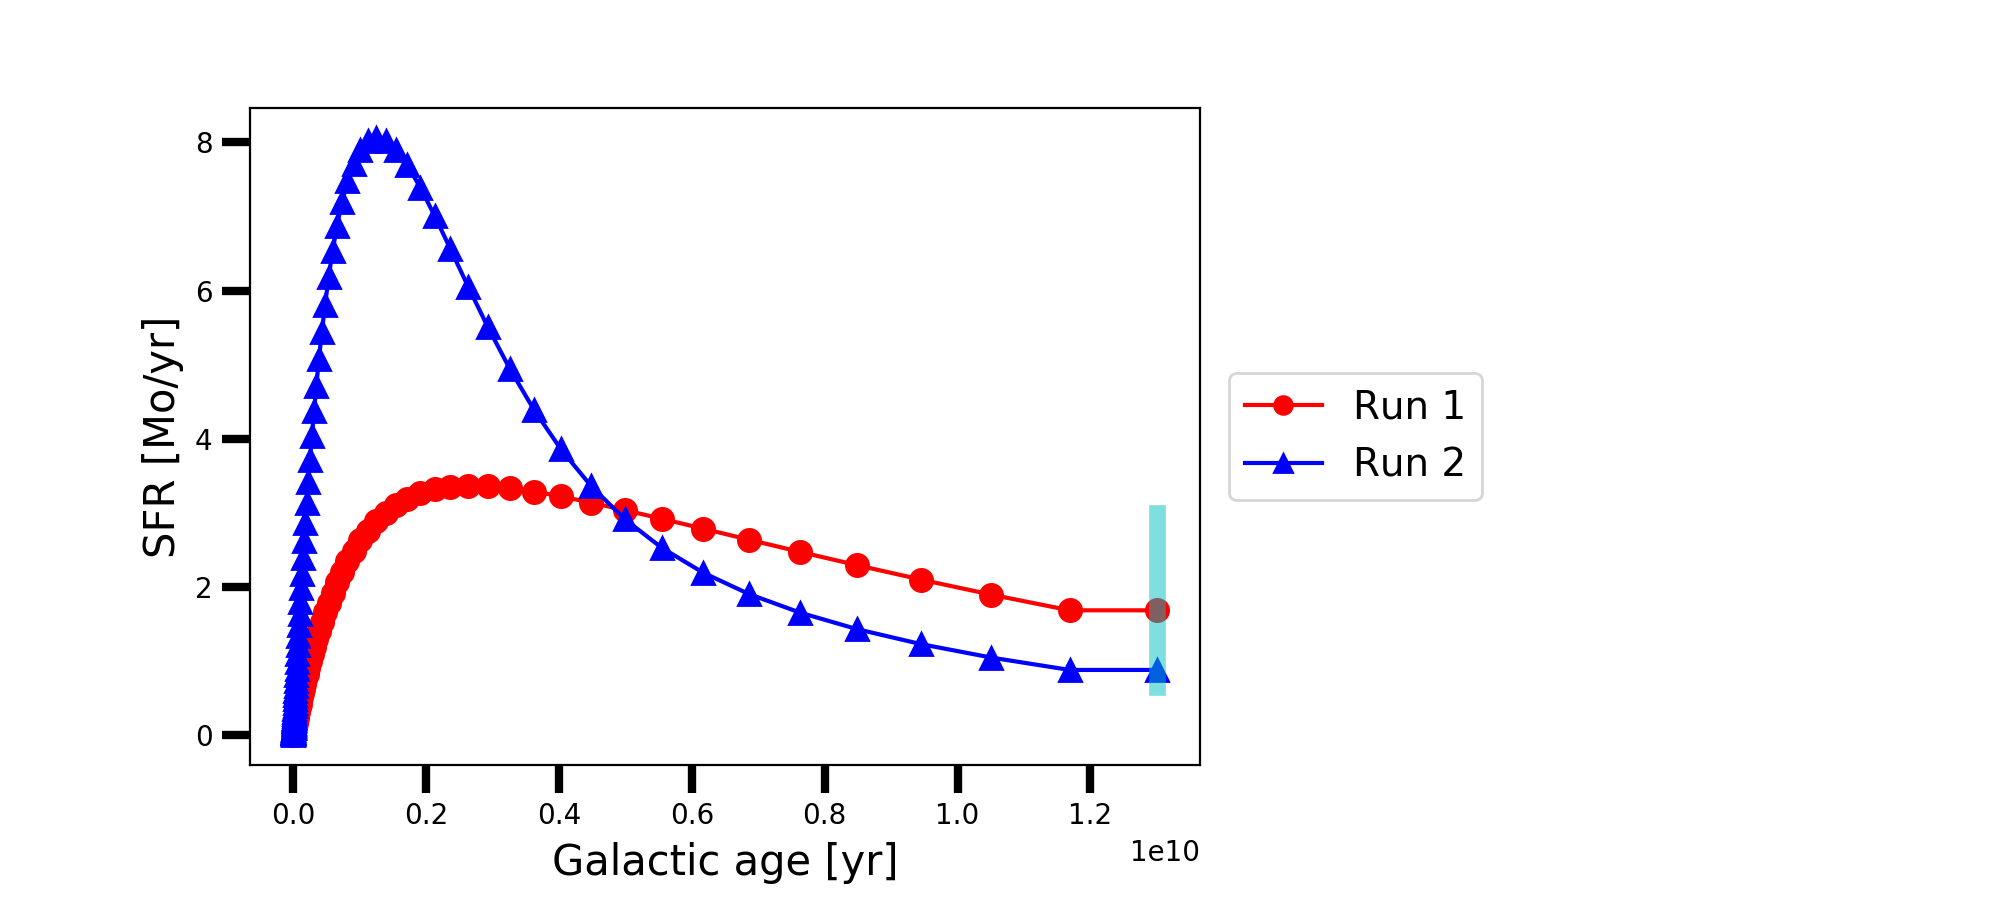

In [5]:
# Plot the evolution of the star formation rate (SFR)
# using the OMEGA plotting function.
%matplotlib nbagg
o_1.inner.plot_star_formation_rate(color='r', marker='o', label='Run 1')
o_2.inner.plot_star_formation_rate(color='b', marker='^', label='Run 2')
plt.xlabel('Galactic age [yr]')

# Plot the observational constraint (cyan color)
plt.plot([13e9,13e9], [0.65,3.0], linewidth=6, color='c', alpha=0.5)

### Plot the Evolution of the Mass of Gas

The current total mass of gas in the Milky Way is about $7\times10^{9}$ M$_\odot$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** The mass of gas depends strongly on the galactic inflow rate.

<IPython.core.display.Javascript object>


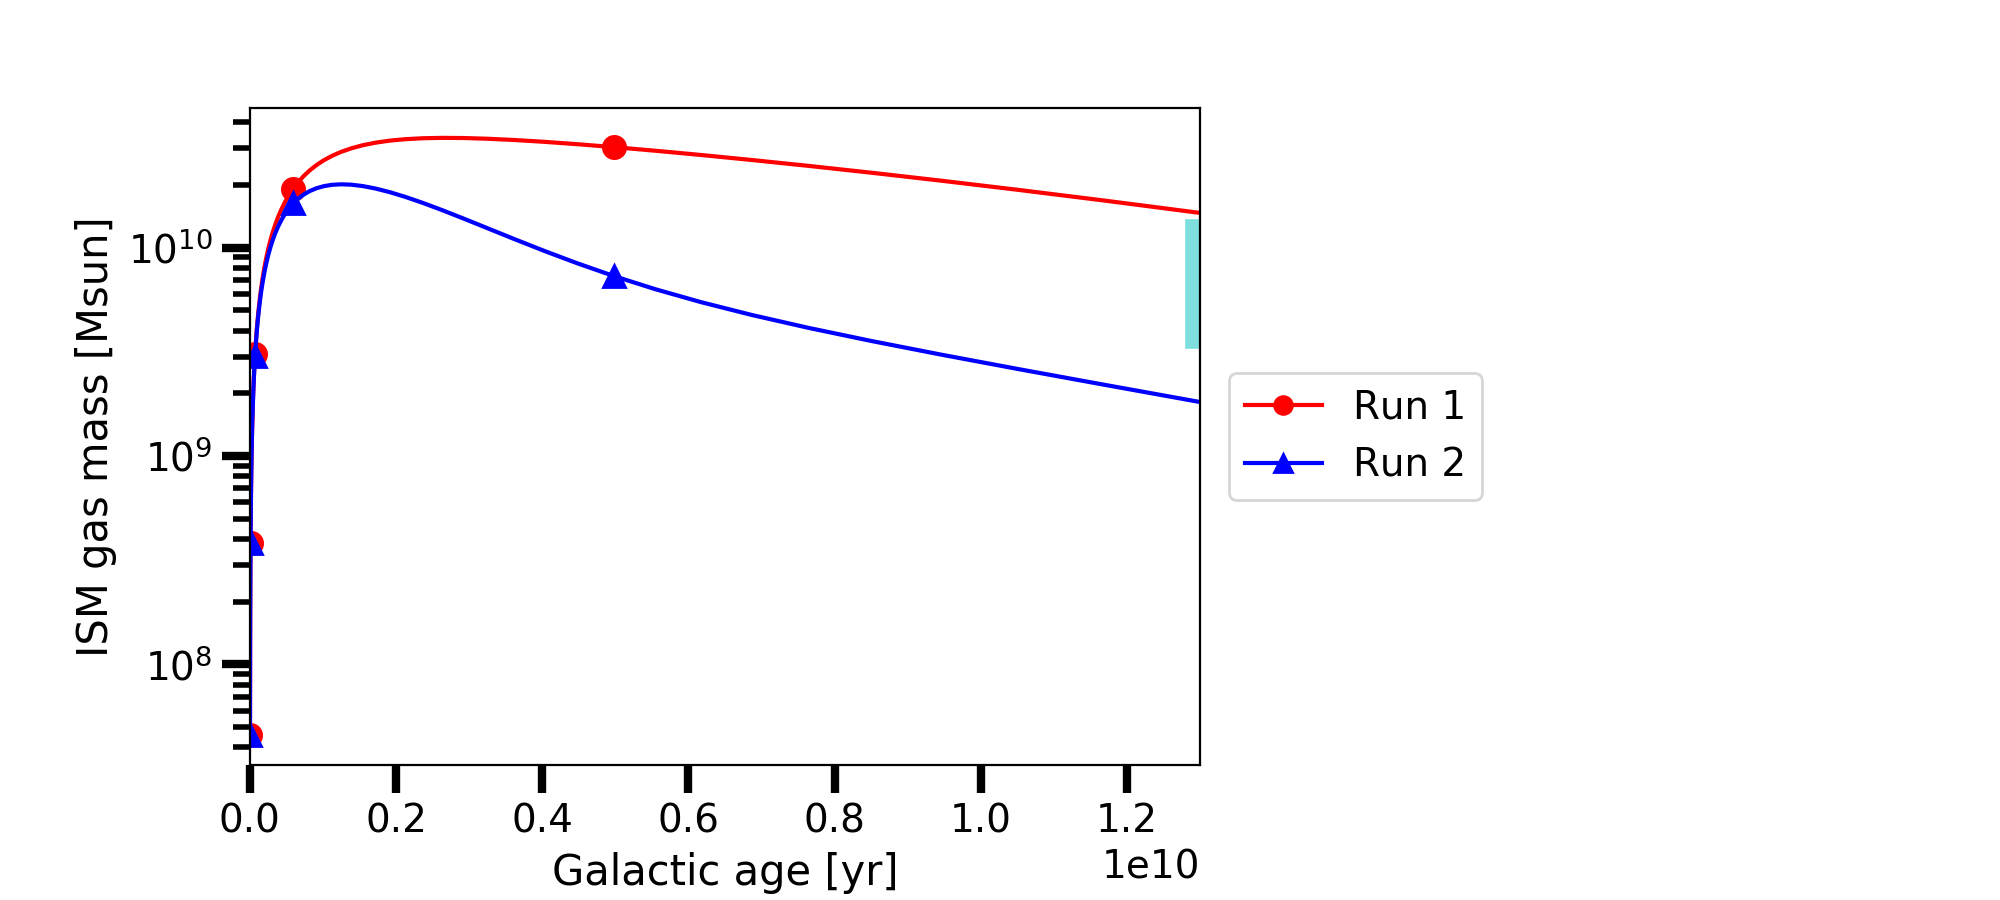

In [6]:
# Plot the evolution of the mass of gas in the
# interstellar medium (ISM) using the OMEGA plotting function.
%matplotlib nbagg
o_1.inner.plot_totmasses(color='r', marker='o', label='Run 1')
o_2.inner.plot_totmasses(color='b', marker='^', label='Run 2')
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')

# Plot the observational constraint (cyan color)
plt.plot([12.9e9,12.9e9], [3.6e9,12.6e9], linewidth=6, color='c', alpha=0.5)

### Plot the Evolution of Iron Abundance [Fe/H]

$[A/B]=\log(n_A/n_B)-\log(n_A/n_B)_\odot$

To represent the solar neighbourhood, [Fe/H] in your model should reach zero (solar value) about 4.6 Gyr before the end of the simulation, representing the moment the Sun formed.

**Useful Information:** The [Fe/H] is mostly sensitive to the star formation efficiency. In other words, it is sensitive to the mass of gas (H) in which stars inject their metals (Fe).

<IPython.core.display.Javascript object>


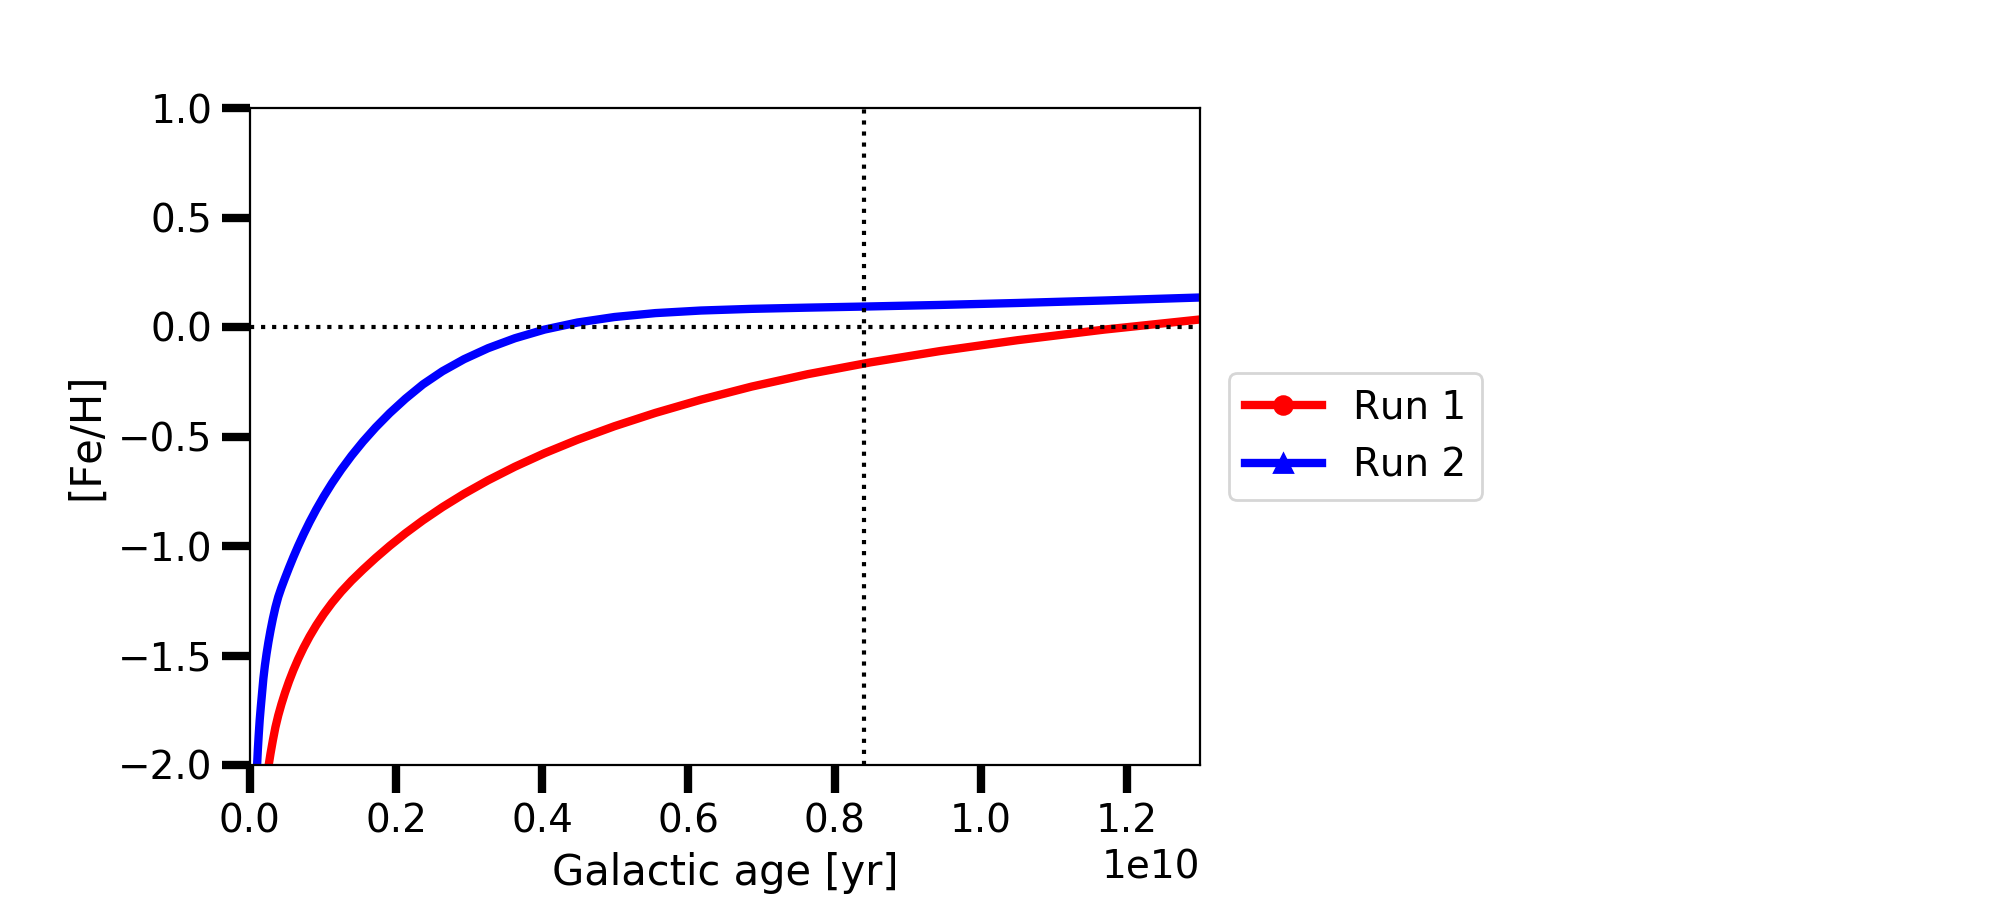

In [7]:
# Plot the evolution of [Fe/H], the iron abundance
# of the gas inside the galaxy, using the OMEGA plotting function.
%matplotlib nbagg
o_1.inner.plot_spectro(color='r', marker='o', label='Run 1')
o_2.inner.plot_spectro(color='b', marker='^', label='Run 2')
plt.ylim(-2,1)
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')

# Plot the solar value (black dotted lines)
t_Sun = 13.0e9 - 4.6e9
plt.plot([t_Sun,t_Sun], [-2,1], ':k')
plt.plot([0,13e9], [0,0], ':k')

# ===================
# Extra Material (optional)
# ===================

The following are extra constraints that can be use to further calibrate your Milky Way model.

### Plot the Evolution of the Galactic Inflow Rate

The current galactic inflow rate estimated for the Milky Way is about 1 M$_\odot$ yr$^{-1}$.

**Note:** You will need to extrapolate by eye the inflow rate predictions up to 13 Gyr.

<IPython.core.display.Javascript object>


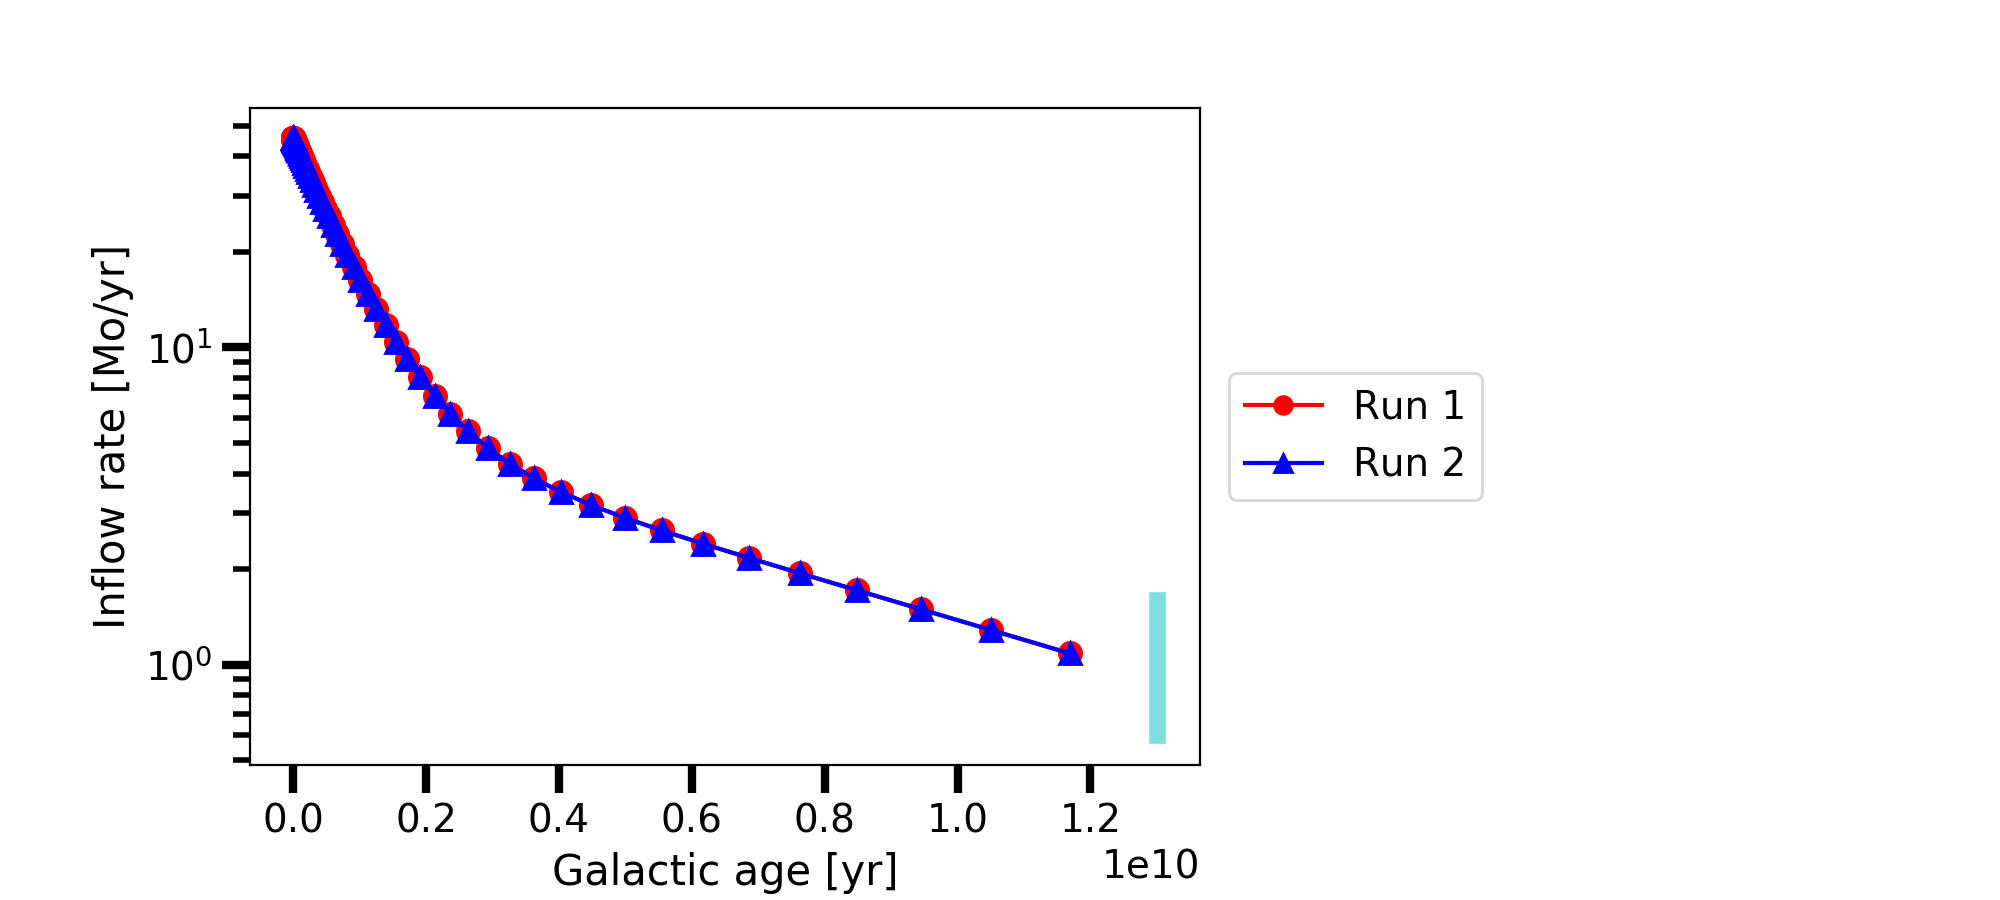

In [8]:
# Plot the evolution of the inflow rate using
# the OMEGA plotting function.
%matplotlib nbagg
o_1.inner.plot_inflow_rate(color='r', marker='o', label='Run 1')
o_2.inner.plot_inflow_rate(color='b', marker='^', label='Run 2')
plt.yscale('log')
plt.xlabel('Galactic age [yr]')

# Plot the observational constraint (cyan color)
plt.plot([13e9,13e9], [0.6,1.6], linewidth=6, color='c', alpha=0.5)